# Explore Data Science Academy

## 1.Importing libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string 
import nltk
import imoji
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import SVC, LinearSVC
# Model perfromance matrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

## 2.Loading data

In [51]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

## 3.Exploratory data analysis 

In [52]:
test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [53]:
train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [54]:
train['lang_id'].shape

(33000,)

In [55]:
test.isna().sum()

index    0
text     0
dtype: int64

In [56]:
train.isna().sum()

lang_id    0
text       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

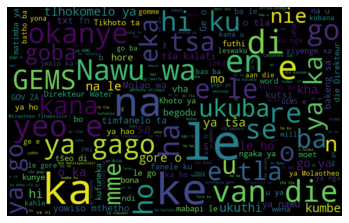

In [57]:
# plotting the wordcloud
allwords = ' '.join([txt for txt in test['text']])
WordCloudtest = WordCloud(width = 800, height=500, random_state = 21 , max_font_size =119).generate(allwords)
plt.imshow(WordCloudtest, interpolation = 'bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

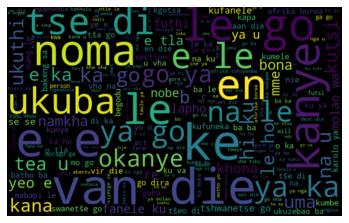

In [58]:
# plotting the wordcloud
allwords = ' '.join([txt for txt in train['text']])
WordCloudtest = WordCloud(width = 800, height=500, random_state = 21 , max_font_size =119).generate(allwords)
plt.imshow(WordCloudtest, interpolation = 'bilinear')
plt.axis('off')
plt.show

## 4.Data engineering 

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.

For the tweet dataset we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation
* removing websites replacing them with web_url
 

In [59]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'web-url'
train['text'] = train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)
test['text'] = test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [60]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [61]:
def clean_message(text):
    
    text= re.sub(r'@[A-Za-z0-9]+', '', text)  #remove @mentions
    text= re.sub(r'#', '', text)              #removing '#'
    text= re.sub(r'rt[\s]+', '', text)        #removing rt
    text= re.sub(r'https?:\/\/\S+', '', text) #removing url if exist
    text= re.sub(r':', '', text)              # removing ':'
    text= re.sub(r'_', '', text)              # removing the underscore
    text= re.sub(r'imoji', '', text)          # removing imojis
    text= re.sub(r'\/', '', text)
    text= re.sub(r'[0-9]', '', text)
    
    return text

# cleaning text
train['text']= train['text'].apply(clean_message)
test['text']=test['text'].apply(clean_message)


In [62]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])  

In [63]:
train['text']=train['text'].apply(remove_punctuation)
test['text']=test['text'].apply(remove_punctuation)

In [64]:
test.head(20)

,index,text
0,1,Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta
5,6,Ke feela dilense tše hlakilego tša pono e tee ...
6,7,fn AM Final Gems Birthing OptionsZULUtxtfn
7,8,Ntjhafatso ya konteraka ya mosebetsi Etsa bonn...
8,9,uGEMS uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,So on occasion are statistics misused


In [65]:
train.head(20)

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


## 5.Modeling

In [67]:
bow=TfidfVectorizer(max_features=1000000)

In [68]:
X = bow.fit_transform(train['text'])
y = train['lang_id']

In [69]:
test_x = bow.transform(test['text'])

In [70]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.1, random_state=23)

**support vector machine algorithm**

In [71]:
svc = SVC(kernel='linear')

In [72]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [73]:
prediction_svc=svc.predict(X_test)

In [74]:
print(accuracy_score(y_test, prediction_svc))

0.9963636363636363


In [75]:
sub=svc.predict(test_x)

In [76]:
final_pred= pd.DataFrame({"index":test['index'], "lang_id":sub}).set_index("index")
final_pred

,lang_id
index,
1,ssw
2,nbl
3,ven
4,ssw
5,ssw
...,...
5678,ssw
5679,nso
5680,sot


In [77]:
final_pred.to_csv('svc_pred1.csv')

**Linear svc**

In [78]:
lsvc =LinearSVC()

In [79]:
lsvc.fit(X_train, y_train)

LinearSVC()

In [80]:
lin_svc=lsvc.predict(X_test)

In [81]:
print(accuracy_score(y_test, lin_svc))

0.996969696969697


In [82]:
lin_sub=lsvc.predict(test_x)

In [83]:
final_pred1= pd.DataFrame({"index":test['index'], "lang_id":lin_sub}).set_index("index")
final_pred1

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr
...,...
5678,eng
5679,nso
5680,sot


In [84]:
final_pred1.to_csv('lsvc_pred.csv')

**Multinomial naive bayes**

In [85]:
mult =MultinomialNB()

In [86]:
mult.fit(X_train, y_train)

MultinomialNB()

In [87]:
mult_pred = mult.predict(X_test)

In [88]:
print(accuracy_score(y_test, mult_pred))

0.9984848484848485


In [89]:
pred_mul=lsvc.predict(test_x)

In [90]:
final_pred2= pd.DataFrame({"index":test['index'], "lang_id":pred_mul}).set_index("index")
final_pred2

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr
...,...
5678,eng
5679,nso
5680,sot


In [91]:
final_pred2.to_csv('multinomial.csv')

**Logistic regression**

In [92]:
lr=LogisticRegression()

In [93]:
lr.fit(X_train, y_train)

LogisticRegression()

In [94]:
log_pred=lr.predict(X_test)

In [95]:
print(accuracy_score(y_test, log_pred))

0.9954545454545455


In [96]:
pred_log=lsvc.predict(test_x)

In [97]:
final_pred3= pd.DataFrame({"index":test['index'], "lang_id":pred_log}).set_index("index")
final_pred3

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr
...,...
5678,eng
5679,nso
5680,sot


In [98]:
final_pred3.to_csv('log.csv')

## Conclusion 

From the data that i had and the algorithms i have realised that by checking the f1-score my models perfom differently.
first i used the support vector machine wich gave me an f1 score of 0.996,
secondly i used the linear support vector machine which i got an f1 score of 0.997,
thirdly i used logistic regression which gave me an f1 score of 0.995 , then lastly i used the MultinomialNB and i got an f1 score of 0.998 which is better than the two above.

Then from the information above i conclude that MultinomialNB was the best algorithm for my data